In [51]:
import time

from checkers import *
from heuristic import *

# from minimax_alphabeta import *
from minimax_alphabeta import AI
from util.helpers import *

In [52]:
def generate_samples(N, depth):
    samples = []
    for _ in range(N):
        WP, BP, K = get_fresh_board()
        player = random.choice([PlayerTurn.WHITE, PlayerTurn.BLACK])
        # print(f"Player NOT moving first: {player}")
        for _ in range(0, random.randint(1, depth)):
            player = switch_player(player)  # Switch to opponent's turn
            lm = generate_legal_moves(WP, BP, K, player)
            if not lm:
                break  # Current player ran out of legal moves. Game over.
            else:
                # print(f"Player {player} has {len(lm)} legal moves. the moves are {lm}")
                pass

            WP, BP, K = do_move(
                WP, BP, K, random.choice(lm), player=player
            )  # Do a random legal move

        lm = generate_legal_moves(WP, BP, K, player)

        samples.append(
            (
                WP,
                BP,
                K,
                0 if player == PlayerTurn.WHITE else 1,  # 0 for white, 1 for black
                lm,  # none if game is over
            )
        )
    return samples

In [61]:
N = 100
samples_to_1 = generate_samples(N, depth=1)
samples_to_2 = generate_samples(N, depth=2)
samples_to_5 = generate_samples(N, depth=3)
samples_to_10 = generate_samples(N, depth=10)
samples_to_20 = generate_samples(N, depth=20)
samples_to_40 = generate_samples(N, depth=40)
samples_to_50 = generate_samples(N, depth=50)
samples_to_60 = generate_samples(N, depth=60)
samples_to_80 = generate_samples(N, depth=80)
samples_to_100 = generate_samples(10 * N, depth=100)
samples_to_150 = generate_samples(5 * N, depth=150)


X = (
    samples_to_1
    + samples_to_2
    + samples_to_5
    + samples_to_10
    + samples_to_20
    + samples_to_40
    + samples_to_60
    + samples_to_80
    + samples_to_100
    + samples_to_150
)
Y = [
    smart(*tup, 0, (tup[0], tup[1], tup[2])) for tup in X
]  # depth 0 and global board state matches current board state

X = [(tup[0], tup[1], tup[2], tup[3], len(tup[4]) if tup[4] is not None else 0) for tup in X]

print(X)
print(Y)

[(4293918720, 19455, 0, 1, 8), (4291952640, 4095, 0, 0, 8), (4290248704, 4095, 0, 0, 8), (4292935680, 4095, 0, 0, 8), (4293918720, 7679, 0, 1, 8), (4293918720, 34815, 0, 1, 8), (4293918720, 7679, 0, 1, 8), (4293918720, 7679, 0, 1, 8), (4292935680, 4095, 0, 0, 8), (4293918720, 7679, 0, 1, 8), (4293918720, 7679, 0, 1, 8), (4291952640, 4095, 0, 0, 8), (4293918720, 11775, 0, 1, 8), (4292083712, 4095, 0, 0, 8), (4293001216, 4095, 0, 0, 8), (4290248704, 4095, 0, 0, 8), (4292935680, 4095, 0, 0, 8), (4289986560, 4095, 0, 0, 8), (4293918720, 19455, 0, 1, 8), (4291952640, 4095, 0, 0, 8), (4293918720, 7935, 0, 1, 8), (4290248704, 4095, 0, 0, 8), (4292935680, 4095, 0, 0, 8), (4290248704, 4095, 0, 0, 8), (4293918720, 18431, 0, 1, 8), (4286054400, 4095, 0, 0, 8), (4293001216, 4095, 0, 0, 8), (4286054400, 4095, 0, 0, 8), (4293918720, 18431, 0, 1, 8), (4290248704, 4095, 0, 0, 8), (4286054400, 4095, 0, 0, 8), (4293918720, 11775, 0, 1, 8), (4290248704, 4095, 0, 0, 8), (4286054400, 4095, 0, 0, 8), (42939

In [83]:
def int_to_binary_array(num):
    return [int(digit) for digit in f"{num:032b}"]


def prepare_sample(sample):
    WP, BP, K, player_turn, num_legal_moves = sample
    # return WP_binary + BP_binary + K_binary + [player_turn, num_legal_moves] + [count_bits(WP)] + [count_bits(BP)] + [count_bits(WP & K)] + [count_bits(BP & K)]
    return (
        [WP]
        + [BP]
        + [K]
        + [player_turn]
        + [count_bits(WP)]
        + [count_bits(BP)]
        + [count_bits(WP & K)]
        + [count_bits(BP & K)]
    )


# Prepare all samples
X_processed = [prepare_sample(sample) for sample in X]

print(X_processed[12])
print(Y[12])

[4293918720, 11775, 0, 1, 12, 12, 0, 0]
-17


Length of X: 2300
Length of Y: 2300
Number of features in each sample of X: 5
Average value of Y: -3.81
Maximum value in Y: 1234
Minimum value in Y: -1316
Number of games that ended with white to move: 296
Number of games that ended with black to move: 4


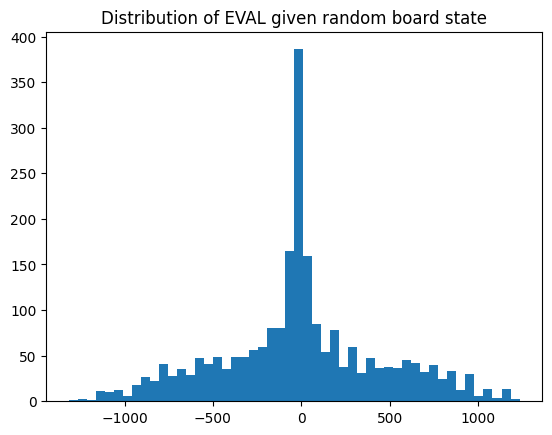

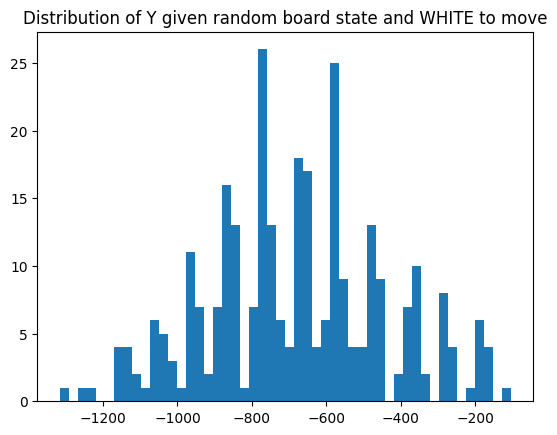

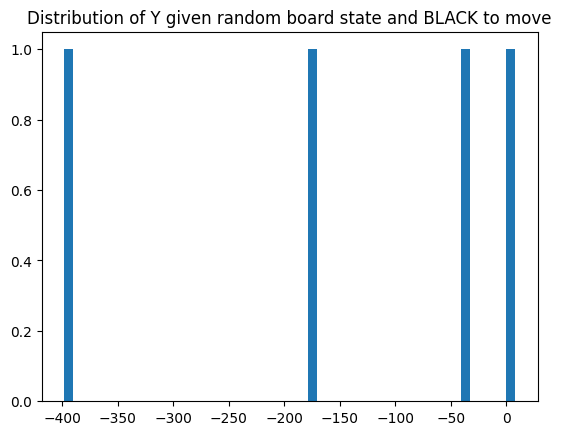

In [64]:
print(f"Length of X: {len(X)}")
print(f"Length of Y: {len(Y)}")
print(f"Number of features in each sample of X: {len(X[0])}")
print(f"Average value of Y: {sum(Y) / len(Y):.2f}")
print(f"Maximum value in Y: {max(Y)}")
print(f"Minimum value in Y: {min(Y)}")

# number of games that ended with white to move (0) and black to move (1)
print(
    f"Number of games that ended with white to move: {len([y for i, y in enumerate(Y) if X[i][0] == 0])}"
)

print(
    f"Number of games that ended with black to move: {len([y for i, y in enumerate(Y) if X[i][0] == 1])}"
)

import matplotlib.pyplot as plt

plt.title("Distribution of EVAL given random board state")
plt.hist(Y, bins=50)
plt.show()

# make two seperate of histograms for Y grouped by player turn
plt.title("Distribution of Y given random board state and WHITE to move")
plt.hist([y for i, y in enumerate(Y) if X[i][0] == 0], bins=50)
plt.show()

plt.title("Distribution of Y given random board state and BLACK to move")
plt.hist([y for i, y in enumerate(Y) if X[i][0] == 1], bins=50)
plt.show()

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim

In [71]:
class CheckersNN(nn.Module):
    def __init__(self):
        super(CheckersNN, self).__init__()
        self.fc1 = nn.Linear(5, 64)  # Adjust 'in_features' based on your input size
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Linear activation for the output layer
        return x

In [72]:
X_tensor = torch.FloatTensor(X)  # Assuming X is already in a suitable numeric format
Y_tensor = torch.FloatTensor(Y)

In [73]:
model = CheckersNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())  # Learning rate can be adjusted

In [74]:
def train_model(model, criterion, optimizer, X, Y, epochs=100, print_every=10):
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X)
        loss = criterion(outputs, Y)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch + 1) % print_every == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}")

            # Print model predictions and true evaluations for a subset of data
            with torch.no_grad():
                sample_indices = torch.randint(
                    0, X.size(0), (5,)
                )  # Select 5 random samples
                for i in sample_indices:
                    prediction = model(X[i]).item()
                    true_value = Y[i].item()
                    print(
                        f"Sample {i}: Prediction = {prediction}, True Value = {true_value}"
                    )

In [75]:
train_model(model, criterion, optimizer, X_tensor, Y_tensor, epochs=1000, print_every=10)


/usr/local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2300])) that is different to the input size (torch.Size([2300, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/1000], Loss: 1043700272594944.0
Sample 105: Prediction = -30687308.0, True Value = -20.0
Sample 2151: Prediction = -229.17266845703125, True Value = 451.0
Sample 510: Prediction = -24264584.0, True Value = 380.0
Sample 1397: Prediction = -15126488.0, True Value = 137.0
Sample 1886: Prediction = -1938601.125, True Value = 522.0
Epoch [20/1000], Loss: 4254858743906304.0
Sample 640: Prediction = -25807782.0, True Value = 36.0
Sample 2066: Prediction = -8910525.0, True Value = 620.0
Sample 898: Prediction = -53533864.0, True Value = 774.0
Sample 2207: Prediction = -688943.3125, True Value = -674.0
Sample 2206: Prediction = -23427384.0, True Value = -483.0
Epoch [30/1000], Loss: 4767072387072.0
Sample 1106: Prediction = 6564845.0, True Value = -138.0
Sample 1577: Prediction = -1085242.75, True Value = 359.0
Sample 931: Prediction = 523225.9375, True Value = 531.0
Sample 1666: Prediction = 3533481.75, True Value = 525.0
Sample 1812: Prediction = -202340.9375, True Value = 3.0
Epoch

In [ ]:
torch.save(model.state_dict(), 'NN/checkers_nn.pth')